In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# sistem drugog reda sa realnim polovima
#W(s)=2/(s+1)(s+2), polovi su -1 i -2

nule= []
polovi=[-1,-2]
pojacanje= [2]
# Kontrolabilna kanonicna forma
Ac,Bc,Cc,Dc = signal.zpk2ss(nule,polovi,pojacanje)
Ac,Bc,Cc,Dc

(array([[-3., -2.],
        [ 1.,  0.]]), array([[ 1.],
        [ 0.]]), array([[ 0.,  2.]]), array([[ 0.]]))

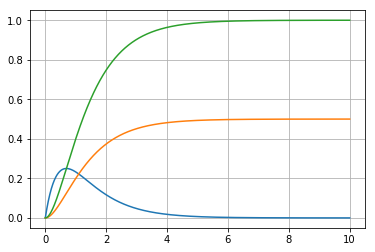

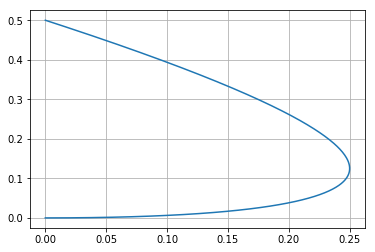

In [4]:
Wc= signal.lti(Ac,Bc,Cc,Dc)
t=np.linspace(0,10,1000)
u=(t>=0)
tt,y,x =signal.lsim(Wc,u,t)
plt.plot(tt,x[:,0],tt,x[:,1],tt,y)
plt.grid()
plt.show()
plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

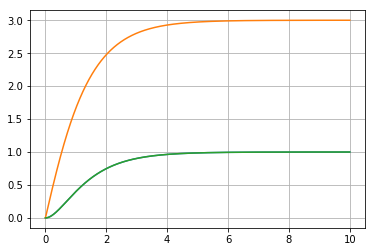

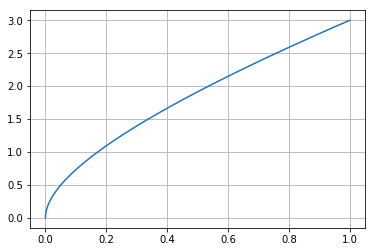

In [24]:
# opservabilna kanonicna forma
Ao= np.matrix([[-3.,1.],[-2.,0.]])
Bo= np.matrix([[0.],[2.]])
Co= np.matrix([[1.,0.]])
Do= np.matrix([[0.]])
Wo=signal.lti(Ao,Bo,Co,Do)
tt,y,x= signal.lsim(Wo,u,t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y)
plt.grid()
plt.show()

plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

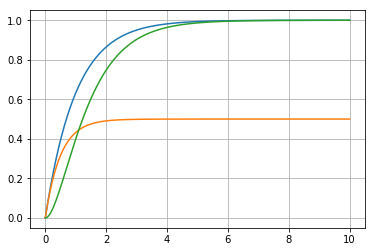

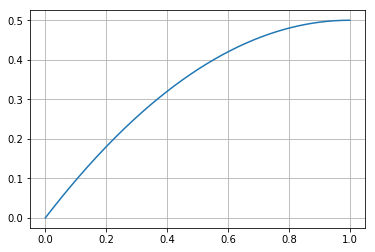

In [43]:
# dijagonalna kanonicna forma
Ad= np.matrix([[-1.,0],[0,-2]])
Bd= np.matrix([[1],[1]])
Cd= np.matrix([[2,-2]])
Dd= np.matrix([[0]])

Wd= signal.lti(Ad,Bd,Cd,Dd)
tt,y,x = signal.lsim(Wd,u,t)
plt.plot(tt,x[:,0],tt,x[:,1],tt,y)
plt.grid()
plt.show()
plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

In [20]:
# AMPLITUDSKA MARGINA
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina je ",round(d,3))

Amplitudska margina je  1.194


In [21]:
# FAZNA MARGINA
PM= 180+ phase[mag[:]>=0][-1]
print("Fazna margina je ",round(PM,3))

Fazna margina je  4.245


In [22]:
# PRESECNA UCESTANOST POJACANJA
w1= w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja je ",round(w1,3))
# FAZNA MARGINA
PM= 180+ phase[mag[:]>=0][-1]
print("Fazna margina je ",round(PM,3))

Presecna ucestanost pojacanja je  2.024
Fazna margina je  4.245


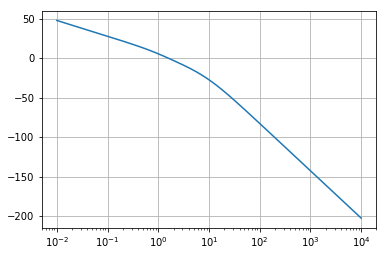

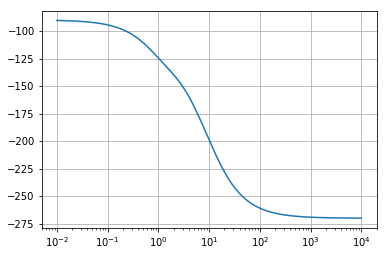

Presecna ucestanost pojacanja je  1.6
Fazna margina je  45.322


In [28]:
# treba povecati za 35 stepeni min
# uzimamo za 10 stepeni vece , pa dobijamo da je 1/alpha = 6
# z=2 , p =12
W=signal.lti([-2],[0,-1,-5,-12],25*6*0.5)
w_log=np.logspace(-2,4,num=1000)
w, mag , phase = signal.bode(W,w=w_log)

plt.figure()
plt.grid()
plt.semilogx(w,mag)
plt.figure()
plt.grid()
plt.semilogx(w,phase)
plt.show()
# PRESECNA UCESTANOST POJACANJA
w1= w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja je ",round(w1,3))
# FAZNA MARGINA
PM= 180+ phase[mag[:]>=0][-1]
print("Fazna margina je ",round(PM,3))

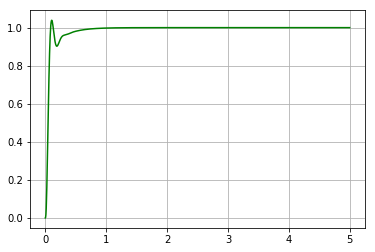

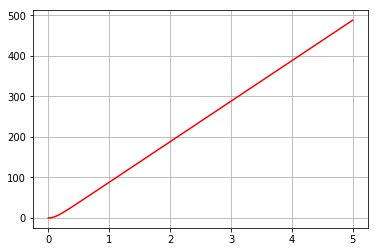

In [24]:
# (s)=W(s)/1+W(s) , W(s)=0.15*20*50000(s+5)/s(s+10)(s+50)(s+100)

brojilac=[0.15*20*50000, 0.15*20*50000*5]
imenilac1=sp.convolve(sp.convolve(sp.convolve([1,0],[1,10]),[1,50]),[1,100])
imenilac=imenilac1+[0, 0, 0, 0.15*20*50000, 0.15*20*50000*5]
G1=signal.lti(brojilac,imenilac)


imenilac2=sp.convolve(sp.convolve([1,0],[1,10]),[1,50])
G2=signal.lti([50000],imenilac2)

t=np.linspace(0,5,1000)

t1,u1 = G1.step(T=t)
t2,u2 = G2.step(T=t)

plt.plot(t1,u1,'g')
plt.grid()
plt.show()
plt.plot(t2,u2,'r')
plt.grid()
plt.show()

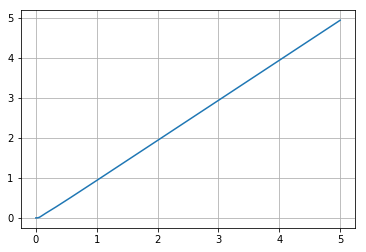

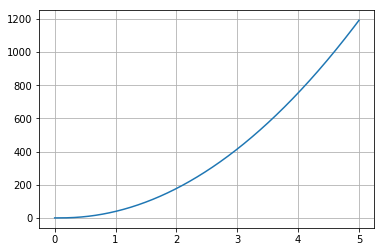

In [14]:
t1,y1,x1=signal.lsim(G1,t,t)
t1,y2,x2=signal.lsim(G2,t,t)
plt.plot(t1,y1)
plt.grid()
plt.show()
plt.plot(t2,y2)
plt.grid()
plt.show()